In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Initialize HOG descriptor
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

Saving python.jpg to python.jpg


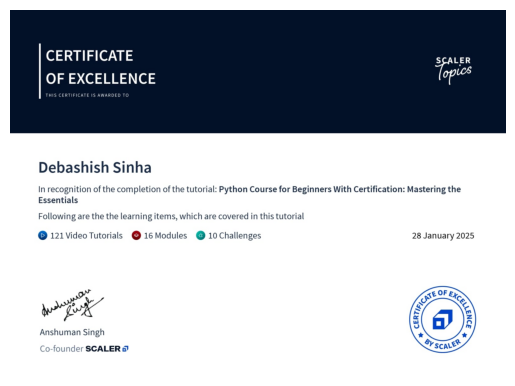

In [ ]:
from google.colab import files
from IPython.display import display
from PIL import Image

uploaded = files.upload()  # Upload an image

for file_name in uploaded.keys():
    image = cv2.imread(file_name)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    plt.imshow(image)
    plt.axis("off")
    plt.show()

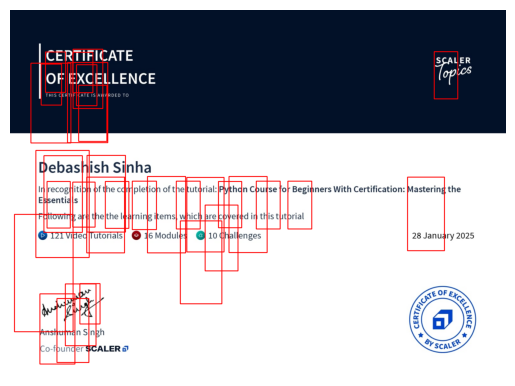

In [ ]:
# Detect people in the image
(rects, weights) = hog.detectMultiScale(image, winStride=(4, 4), padding=(8, 8), scale=1.05)

# Draw bounding boxes around detected pedestrians
for (x, y, w, h) in rects:
    cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)

# Display result
plt.imshow(image)
plt.axis("off")
plt.show()

In [6]:
from google.colab.patches import cv2_imshow

# Upload video file
uploaded_video = files.upload()

# Load video
video_path = list(uploaded_video.keys())[0]
cap = cv2.VideoCapture(video_path)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Convert frame to grayscale
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Detect pedestrians
    rects, weights = hog.detectMultiScale(frame, winStride=(4, 4), padding=(8, 8), scale=1.05)

    # Draw bounding boxes
    for (x, y, w, h) in rects:
        cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)

    # Show frame
    cv2_imshow(frame)

cap.release()
cv2.destroyAllWindows()

TypeError: 'NoneType' object is not subscriptable